In [1]:
!python3 predict_convex_hull.py -c ckpts/hk_state_0099999.ckpt -d 256 -l 500 -s 4242

Namespace(checkpoint_filepath='ckpts/hk_state_0099999.ckpt', num_vertex=500, random_seed=4242, rnn_hidden_size=256)


In [2]:
import pickle
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

with open('/tmp/encoded_value.pk', 'rb') as f:
    values = pickle.load(f)
with open('/tmp/decoder_query.pk', 'rb') as f:
    queries = pickle.load(f)

pca = PCA(n_components=2)
pca.fit(np.concatenate([values[:, 0, :], queries], axis=0))

PCA(n_components=2)

In [3]:
!python3 predict_convex_hull.py -c ckpts/hk_state_0099999.ckpt -d 256 -l 30 -s 99989

Namespace(checkpoint_filepath='ckpts/hk_state_0099999.ckpt', num_vertex=30, random_seed=99989, rnn_hidden_size=256)


(9, 128)
(9, 2)


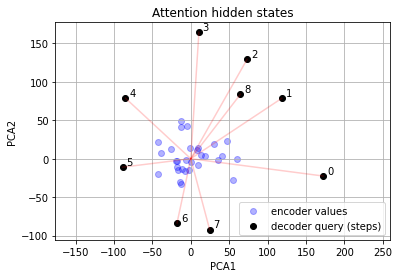

In [4]:
with open('/tmp/encoded_value.pk', 'rb') as f:
    values = pickle.load(f)

with open('/tmp/decoder_query.pk', 'rb') as f:
    queries = pickle.load(f)

new_X = pca.transform(values[:, 0, :])

print(queries.shape)
new_qq = 5*pca.transform(queries)    
print(new_qq.shape)
colors = cm.rainbow(np.linspace(0, 1, new_X.shape[0]-1))
plt.scatter(new_X[:-1, 0], new_X[:-1, 1], alpha=0.3, color='blue', label='encoder values')
plt.scatter(new_qq[:, 0], new_qq[:, 1], color='black', label='decoder query (steps)')
for i in range(new_qq.shape[0]):
    plt.plot([0, new_qq[i, 0]], [0, new_qq[i, 1]], c='red', alpha=0.2)
    plt.annotate(str(i), xy=(new_qq[i, 0]+5, new_qq[i, 1] + 3) )
_=plt.axis('equal')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.title('Attention hidden states')
plt.savefig('imgs/original_att.jpg')

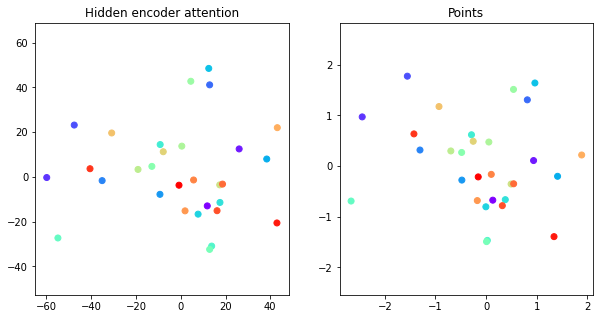

In [5]:

with open('/tmp/points.pk', 'rb') as f:
    points = pickle.load(f)

x, y= zip(*points)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
colors = cm.rainbow(np.linspace(0, 1, new_X.shape[0]-1))
plt.scatter(-new_X[:-1, 0], new_X[:-1, 1], color=colors)
plt.title('Hidden encoder attention')
_=plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(x, y, color=colors)
plt.title('Points')
_=plt.axis('equal')
plt.savefig('imgs/encoder_attention_pca.jpg')

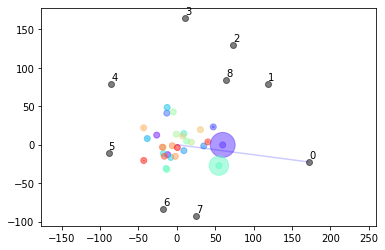

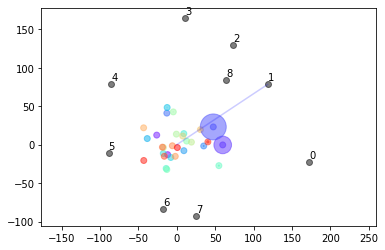

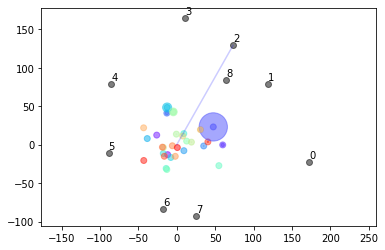

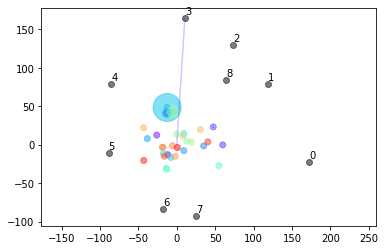

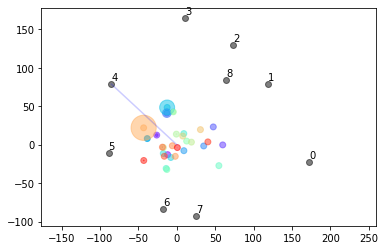

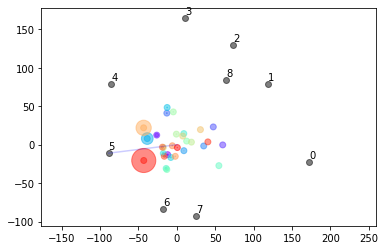

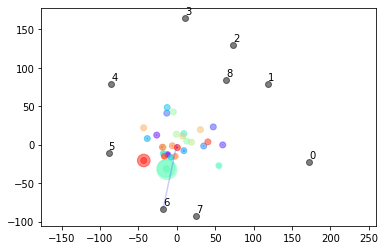

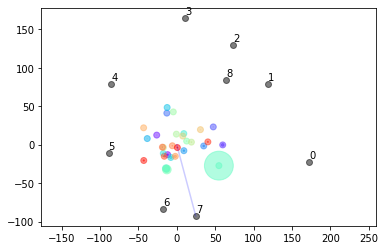

In [6]:
for i in range(8):
    size = new_X[:-1, 0] * new_qq[i] [0] + new_X[:-1, 1] * new_qq[i] [1]
    size = size / 500
    size = np.exp(size)
    size = size / np.sum(size) * 1000
    colors = cm.rainbow(np.linspace(0, 1, new_X.shape[0]-1))
    plt.scatter(new_X[:-1, 0], new_X[:-1, 1], color=colors, alpha=0.5)

    plt.scatter(new_X[:-1, 0], new_X[:-1, 1], color=colors, s=size, alpha=0.5)
    plt.scatter(new_qq[:, 0], new_qq[:, 1], color='black', alpha=0.5)
    for j in range(new_qq.shape[0]):
        if i == j: 
            plt.plot([0, new_qq[j, 0]], [0, new_qq[j, 1]], c='blue', alpha=0.2)
        plt.annotate(str(j), xy=(new_qq[j, 0], new_qq[j, 1] + 5) )
    _=plt.axis('equal')
    plt.show()
    plt.close('all')